# Hylight

In [1]:
import hylightpy

In [2]:
hylightpy.__version__

'0.0.12'

First, we initialise the class with a 10-level atom in Case~B, enabling radiative recombination only (i.e. shutting down collisional excitation from the ground states). 

Here, we only use 10 levels for simplcity. The user should caution that 10 levels are sufficient to accurately predict H$\alpha$ emissivity. 

**NOTE: Invoking a large numer of levels is a memory-intensive calculation. We caution the user of the memory usage.**

The following line will create a cache directory in your working directory. There is the optional to point to a user-defined path. 

We use a cache folder to store the cascade matrix elements so that we don't need to compute them everytime. 

In [3]:
HI = hylightpy.HIAtom(nmax = 10, verbose=True, caseB=True,
                        recom=True, coll=False, cache_path='./cache/')

print("Class initialized")

 ░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░      ░▒▓█▓▒░░▒▓██████▓▒░░▒▓█▓▒░░▒▓█▓▒░▒▓████████▓▒░ 
 ░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░      ░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░  ░▒▓█▓▒░     
 ░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░      ░▒▓█▓▒░▒▓█▓▒░      ░▒▓█▓▒░░▒▓█▓▒░  ░▒▓█▓▒░     
 ░▒▓████████▓▒░░▒▓██████▓▒░░▒▓█▓▒░      ░▒▓█▓▒░▒▓█▓▒▒▓███▓▒░▒▓████████▓▒░  ░▒▓█▓▒░     
 ░▒▓█▓▒░░▒▓█▓▒░  ░▒▓█▓▒░   ░▒▓█▓▒░      ░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░  ░▒▓█▓▒░     
 ░▒▓█▓▒░░▒▓█▓▒░  ░▒▓█▓▒░   ░▒▓█▓▒░      ░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░▒▓█▓▒░░▒▓█▓▒░  ░▒▓█▓▒░     
 ░▒▓█▓▒░░▒▓█▓▒░  ░▒▓█▓▒░   ░▒▓████████▓▒░▒▓█▓▒░░▒▓██████▓▒░░▒▓█▓▒░░▒▓█▓▒░  ░▒▓█▓▒░     
Folder './cache/' created.
 ... Read numerical data in time 0.37
 ... Einstein dictionary pickled to file Einstein_As.pickle
 ... Imposing caseB (no Lyman-transitions) 
Recombination rates read and fitted
Collsional Excitaion Rates read and fitted
 ... Cascade matrix: P copied in time 0.01 s
 ... Cascade matrix: probability matrix computed (eq. 4.8) in time 0.00
 ... Cascade matrix

We storeed the Einstein $A$ coefficients in the class. They can be viewed using the following line, where we use the ($n$,$l$) to denote the atomic states. 

In [4]:
# Einstein coefficients correponding to 3p -> 2s transition
HI.A[(3,1)][(2,0)]

np.float64(22436400.0)

Note that in Case~B, the Lyman transitions are optically thick, hence we force the Einstein $A$ values of the Lyman transitions to be zero. 

In [5]:
# Einstein coefficients correponding to 2p -> 1s transition, 0 in Case B
HI.A[(2,1)][(1,0)]

0.0

## Line emissivity

The user specifies the electron density, HI and HII density as well as the temperature and the transition they are intersted in. 
In the following example, we set the electron density and HII density to 100 cm$^{-3}$ and the HI density to 10$^{-5}$ cm$^{-3}$. As an example, we calculate the 3$\to$ 2 transition (Balmer $\alpha$) at 10$^4$ K. 

All units are in CGS, i.e. density in cm$^{-3}$. We utilise the unyt package to ensure the units are correct. 

In [7]:
import unyt

In [8]:
HI.get_emissivity(ne=100 * unyt.cm**(-3),
                  nHII=100 * unyt.cm**(-3),
                  nHI=1e-5 * unyt.cm**(-3),
                  temp=1e4 * unyt.K,
                  nupper=3, nlower=2)

unyt_quantity(2.77324826e-21, 'erg/(cm**3*s)')

## Level population for a specific state

The user specifies the electron density, HI and HII density as well as the temperature and the specific state they are intersted in. 
In the following example, we set the electron density and HII density to 100 cm$^{-3}$ and the HI density to 10$^{-5}$ cm$^{-3}$. As an example, we calculate the 3$s$ level population density at 10$^4$ K. 

All units are in CGS, i.e. density in cm$^{-3}$. 

In [10]:
levelpop_3s = HI.compute_level_pop(ne=1e2 * unyt.cm**(-3), 
                                   nHI=1e-5 * unyt.cm**(-3),
                                   nHII=1e2 * unyt.cm**(-3), 
                                   temp=1e4 * unyt.K, 
                                   n=3, l=0)
print('The 3s level population density {:.2e} cm^(-3)'.format(levelpop_3s))

The 3s level population density 2.22e-17 cm^(-3)


### Temperature dependence of the level population

We demonstrate the temperature dependence of level popualtion 3$s$ in the following example. 

In [11]:
from matplotlib import pyplot as plt
import numpy as np

In [15]:
n = 3
l = 0
logT_list = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
levelpop = np.zeros_like(logT_list, dtype=float)
for i, logT in enumerate(logT_list):
    levelpop[i] = HI.compute_level_pop(ne=1e2 * unyt.cm**(-3), 
                                       nHI=1e-5 * unyt.cm**(-3),
                                       nHII=1e2 * unyt.cm**(-3), 
                                       temp=10**logT * unyt.K, 
                                       n=3, l=0)

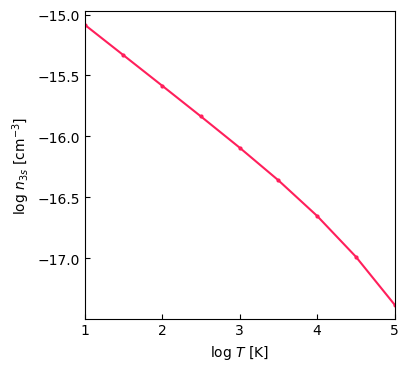

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.plot(logT_list, np.log10(levelpop), color='#FF1F5B', marker='o', linestyle='-', markersize=2)

ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(r'log $T$ [K]')
ax.set_ylabel(r'log $n_{3s}$ [cm$^{-3}$]')
ax.set_xlim(1, 5)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

## Recombination rate coefficients

In [17]:
import importlib

In [19]:
fpath = importlib.resources.files('hylightpy.data').joinpath('h_iso_recomb_HI_150.dat')
recom_dict = HI.read_recombination_rates(fname=fpath)

In [20]:
logTs = recom_dict['LogTs']
alpha_nl = recom_dict['recom_data']

### Temperature-dependence of the total recombination rate coefficent

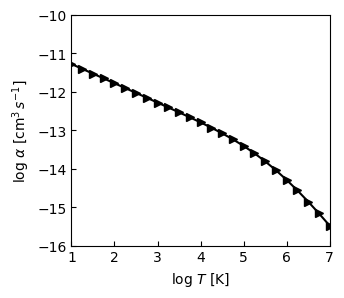

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10/3, 3))

# index 0 gives the total recombination rate
ax.plot(logTs, alpha_nl.iloc[0, 2: 43], color='k', linestyle='-', marker='>')


ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(r'log $T$ [K]')
ax.set_ylabel(r'log $\alpha$ [cm$^{3} \, s^{-1}$]')
ax.set_xlim(1, 7)
ax.set_ylim(-16, -10)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

### Temperature-dependence of the recombination rate coefficent of a specific state

The followng function calculates the index of a specific level in the recombination table. 

In [22]:
def get_l_level_index(n=1, l=0):
    assert type(n) == int and type(l) == int, 'n and l must be intergers.'
    assert n >= 1, 'Princuple quantum number can not be smaller than 1.'
    assert l < n and l >= 0, 'Angular momentum must be positive and smalled than principle quantum number.'
    
    il = 0
    for j in np.arange(1, n):
        il = il + j 
    il = il + l + 1 # count the l level at current n level, l start from 0
    
    return il

For example, for level 3$s$, the index is 4:

In [23]:
get_l_level_index(n=3, l=0)

np.int64(4)

Hence, the temperature-dependence of the recombination rate coefficient $\alpha_{3,0}$ looks like:

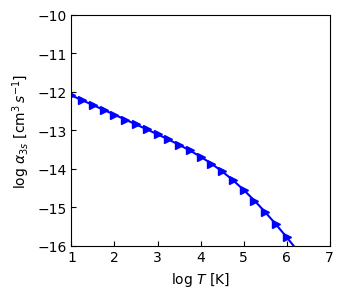

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10/3, 3))

# index 4 gives alpha_{3s}
ax.plot(logTs, alpha_nl.iloc[4, 2: 43], color='blue', linestyle='-', marker='>')


ax.set_yscale('linear')
ax.set_xscale('linear')
ax.set_xlabel(r'log $T$ [K]')
ax.set_ylabel(r'log $\alpha_{3s}$ [cm$^{3} \, s^{-1}$]')
ax.set_xlim(1, 7)
ax.set_ylim(-16, -10)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")